In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

In [2]:
path = 'training_set_VU_DM_PrepOutliers.csv'

In [3]:
# import data without outliers
df = pd.read_csv(path)

### Since data is too large to be processed by KNN or Iterative Imputer and splitting data also doesnt work well, we will get rid of vars with > 50 % missings

In [4]:
# Filter variables with many missings
filter = df.columns[df.isna().mean() > 0.5]

In [6]:
# Drop columns with excessively many variables
df = df.drop(columns=filter)

In [7]:
df.isnull().mean() * 100

srch_id                         0.000000
date_time                       0.000000
site_id                         0.000000
visitor_location_country_id     0.000000
prop_country_id                 0.000000
prop_id                         0.000000
prop_starrating                 0.000000
prop_review_score               0.148517
prop_brand_bool                 0.000000
prop_location_score1            0.000000
prop_location_score2           21.990151
prop_log_historical_price       0.000000
position                        0.000000
price_usd                       0.040195
promotion_flag                  0.000000
srch_destination_id             0.000000
srch_length_of_stay             0.000000
srch_booking_window             0.000000
srch_adults_count               0.000000
srch_children_count             0.000000
srch_room_count                 0.000000
srch_saturday_night_bool        0.000000
orig_destination_distance      32.425766
random_bool                     0.000000
click_bool      

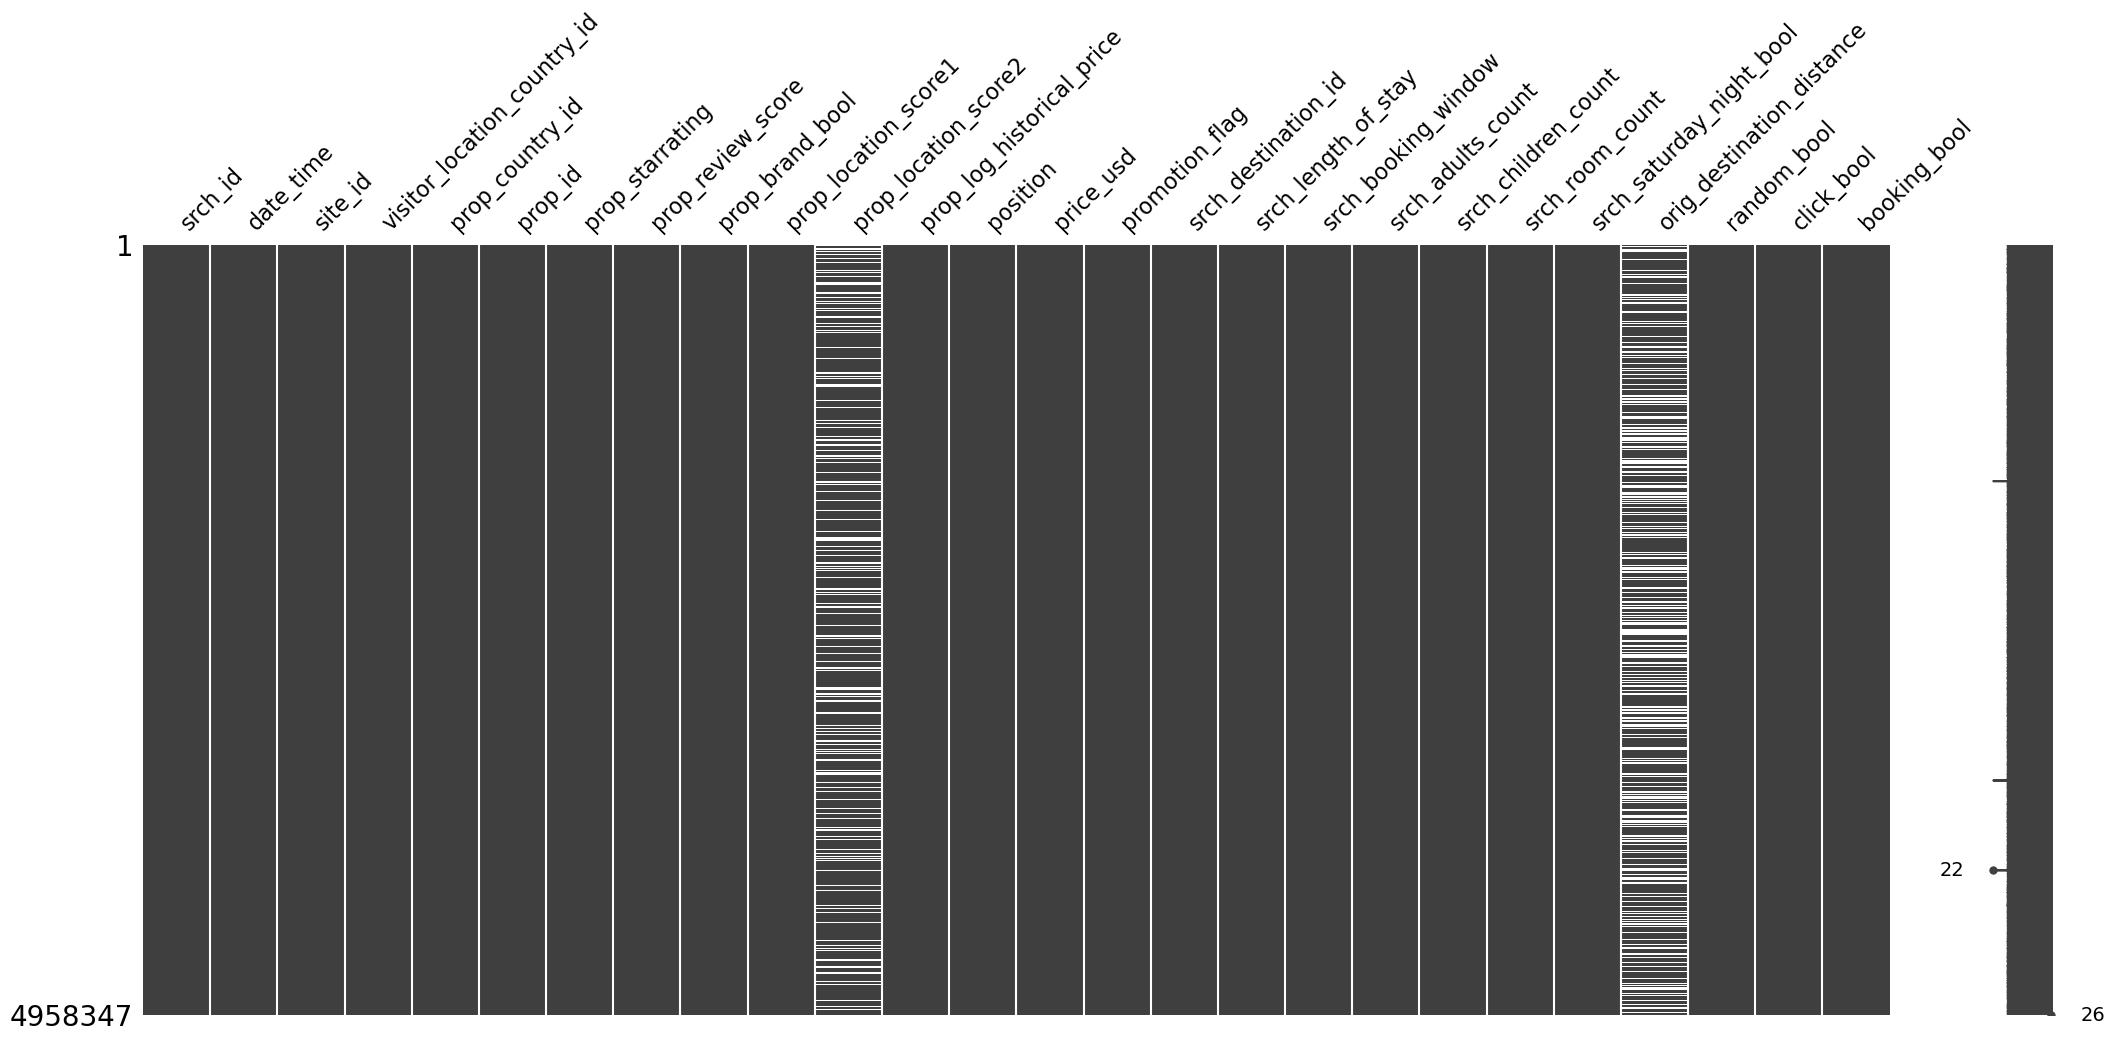

In [8]:
# Visualize the columns with missings > 50 % 
msno.matrix(df)
plt.show()

In [ ]:
# from the graph we can conclude that the rows missing are probably missing at random

In [9]:
# Date_time should be transformed to datetime format
[col for col in df.columns if df[col].dtype == 'object']

['date_time']

In [10]:
# Convert the date column into proper format
df['date_time'] = pd.to_datetime(df['date_time'])

## Apply KNN

In [20]:
from sklearn.impute import KNNImputer
# It's a good idea to normalize the numeric data between 0 and 1, because KNN measures distance
# and would be better input for the algorithm
from sklearn.preprocessing import MinMaxScaler

In [21]:
# instantiate the KNN
knn_imputer = KNNImputer()

In [14]:
scaler = MinMaxScaler(feature_range=(0,1))

In [22]:
# date-time cannot be converted to value between 0 and 1 so we can drop it for now (for the testing)
df_scaled = df.copy(deep=True).drop('date_time', axis=1)

In [23]:
# Scale dataset between 0 and 1 for simplicity of the model
df_scaled = scaler.fit_transform(df_scaled)

In [24]:
# Apply KNN to scaled dataset
df_scaled = knn_imputer.fit_transform(df_scaled)

KeyboardInterrupt: 

# Run a random forest algorithm for prediction

# Applying MICE 

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

In [ ]:
MICE_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(),n_nearest_features=None, imputation_order='ascending')

In [ ]:
df_scaled = MICE_imputer.fit_transform(df_scaled)